# import the neccessary module and load data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from datetime import date

data=pd.read_excel('Data.xlsx')

# Drop irrelevant column and clean data 

In [2]:
cols_to_drop=['miles','Rescheduled_Date','Date_of_Cancelation','title']
df=data.drop(cols_to_drop,axis=1)

# Generate Age

In [3]:
def age(birthdate):
    today = date.today()
    age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
    return age

for index, row in df.iterrows():
    df.iloc[index,3]=age(row['dateOfBirth'])

# Modify Class of service

In [4]:
df.loc[df['cabin_class of service'] == 'Economy Class','cabin_class of service']='Economy'
df.loc[df['cabin_class of service'] == 'Business Class','cabin_class of service']='Business'

df.loc[df['Ticket First time Use'] == 'Yes','Ticket First time Use']='Ticket_Used'
df.loc[df['Ticket First time Use'] == 'No','Ticket First time Use']='TF_NOtUsed'

df.loc[df['Refund Status'] == 'Yes','Refund Status']='Refunded'
df.loc[df['Refund Status'] == 'No','Refund Status']='Not_Refund'

# Check for null value

<AxesSubplot:>

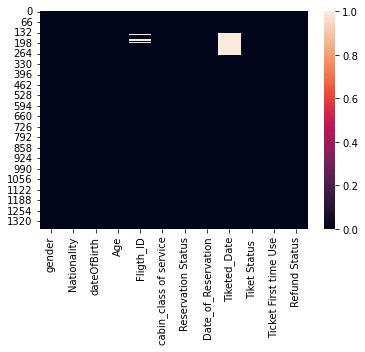

In [5]:
sb.heatmap(df.isnull())

# Filling Missing value

In [6]:
df["gender"].fillna("No gender", inplace = True)
df["Nationality"].fillna("No Nationality", inplace = True)
df["dateOfBirth"].fillna("No dateOfBirth", inplace = True)
df["Age"].fillna("No Age", inplace = True)
df["Fligth_ID"].fillna("No Fligth_ID", inplace = True)
df["cabin_class of service"].fillna("No cabin_class", inplace = True)
df["Reservation Status"].fillna("No Reservation Status", inplace = True)
df["Date_of_Reservation"].fillna("No Date_of_Reservation", inplace = True)
df["Tiketed_Date"].fillna("No Tiketed_Date", inplace = True)
df["Ticket First time Use"].fillna("No Ticket First time Use", inplace = True)
df["Refund Status"].fillna("No Refund Status", inplace = True)

<AxesSubplot:>

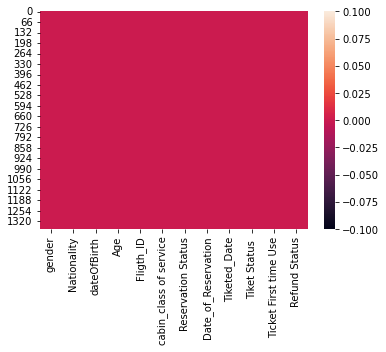

In [7]:
sb.heatmap(df.isnull())

# Convert Categorical value to binary value

In [8]:
genderColumn=pd.get_dummies(df['gender'])
classOfServiceColumn=pd.get_dummies(df['cabin_class of service'])
reservationColumn=pd.get_dummies(df['Reservation Status'])
ticketColumn=pd.get_dummies(df['Ticket First time Use'])
refundColumn=pd.get_dummies(df['Refund Status'])



In [9]:
new_df=pd.concat((df,genderColumn,classOfServiceColumn,reservationColumn,ticketColumn,refundColumn),axis=1)

# Drop class of service and gender column

In [10]:
cols_to_drop=['gender','cabin_class of service','Reservation Status','Ticket First time Use','Refund Status','Canceled']
new_df=new_df.drop(cols_to_drop,axis=1)

In [11]:
#rename ticket column to ticket status 
new_df.rename(columns={'Tiket Status ':'Booking Status','Tiketed':'Ticket Status'},inplace=True)


# Convert Categorical value to number value

In [12]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical value to number 
le_nationality=LabelEncoder()
le_fligth_ID=LabelEncoder()
le_book_status=LabelEncoder()

new_df['N_Nationality']=le_nationality.fit_transform(new_df['Nationality'])
new_df['N_FlightID']=le_nationality.fit_transform(new_df['Fligth_ID'])
new_df['N_BookingStatus']=le_nationality.fit_transform(new_df['Booking Status'])

# convert date or timestamp to number 

le_TiketedDate=LabelEncoder()
le_ReservationDate=LabelEncoder()

new_df['N_TicketedDate']=le_nationality.fit_transform(new_df['Tiketed_Date'])
new_df['N_ReservationDate']=le_nationality.fit_transform(new_df['Date_of_Reservation'])


# Drop categorical value

In [13]:
cols_to_drop=['Nationality','Booking Status','Fligth_ID','dateOfBirth','Tiketed_Date','Date_of_Reservation']
new_df=new_df.drop(cols_to_drop,axis=1)


# Split the Dataset

In [14]:
from sklearn.model_selection import train_test_split

x=new_df.values
y=new_df['Ticket Status']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

# Build Decission Tree Classifier

In [17]:
from sklearn import tree

# Build
dt_clf=tree.DecisionTreeClassifier() 

# Train
dt_clf.fit(x_train,y_train)
dt_clf.score(x_test,y_test)
# Make prediction 


1.0

In [18]:
new_df

,Age,F,M,Business,Economy,Ticket Status,TF_NOtUsed,TF_Used,Not_Refund,Refunded,N_Nationality,N_FlightID,N_BookingStatus,N_TicketedDate,N_ReservationDate
0,36,0,1,0,1,1,1,0,1,0,11,4,0,78,66
1,25,1,0,0,1,1,1,0,1,0,22,4,0,78,93
2,36,0,1,0,1,1,1,0,1,0,11,3,0,70,77
3,28,0,1,0,1,1,1,0,1,0,12,0,0,37,3
4,23,0,1,0,1,1,1,0,1,0,11,0,0,37,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,44,1,0,0,1,1,1,0,1,0,43,0,5,60,41
1364,26,0,1,0,1,1,1,0,1,0,11,1,5,42,44
1365,35,1,0,0,1,1,1,0,1,0,11,3,5,14,17
1366,44,0,1,0,1,1,1,0,1,0,11,3,5,89,79
